---
# *"Backtesting" Administracion de Riesgos*
---
## By *Torres Ferrer Luis Noe*
---
### 319207446 

![Ejemplo de VaR](https://www.investopedia.com/thmb/FzdkwMMQbtOxD4okOc2EQP5NuWM=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Value_At_Risk-41be4adde1ef4915a1ca7f85407d77c6.jpg)


In [32]:
# yfinance: Descarga datos de mercados financieros de Yahoo Finance
import yfinance as yf

# numpy: Soporte para arrays y matrices, con funciones matemáticas de alto nivel. 
import numpy as np

# pandas: Estructuras de datos y herramientas para análisis de datos
import pandas as pd

# plotly.graph_objects: Creación de visualizaciones interactivas
import plotly.graph_objects as go

# scipy.stats: Funciones estadísticas y distribuciones probabilísticas
import scipy.stats as stats

# pandas_ta: Análisis técnico e indicadores para trading
import pandas_ta as ta

# math: Funciones matemáticas básicas (trigonométricas, logaritmos, etc.)
import math

# matplotlib.pyplot: Visualización de datos en 2D (similar a MATLAB)
import matplotlib.pyplot as plt

# Widgets interactivos para Jupyter Notebook
import ipywidgets as widgets 

# IPython.display: Herramientas para mostrar objetos en Jupyter Notebook
from IPython.display import display, clear_output, HTML

In [ ]:
pip install ipywidgets #Si no lo tienes instalado esto ayuda a generar widgets para pedir cosas al usuario. :D

In [ ]:

# Lista de tickers (Acciones del mercado Local Mexicano)
Tickers = ["CEMEXCPO.MX", "CUERVO.MX", "LACOMERUBC.MX", "GRUMAB.MX",
           "VOLARA.MX", "BIMBOA.MX", "AGUA.MX", "TLEVISACPO.MX"]

# Creamos un diccionario para asociar cada ticker con un Text widget
inputs = {ticker: widgets.IntText(description=ticker, value=0) for ticker in Tickers}

# Mostrar los widgets
for widget in inputs.values():
    display(widget)

# Botón para confirmar
boton = widgets.Button(description="Confirmar",
                      button_style="success",
                      icon="check")

# Función que se ejecuta al hacer clic
def on_button_clicked(b):
    with output: # Limpiar la salida anterior
        clear_output() 
        titulos = [inputs[ticker].value for ticker in Tickers]
        titulos_acciones = dict(zip(Tickers, titulos))  # Crear diccionario con tickers y cantidades 
        print("Títulos ingresados:")
        for ticker, cantidad in titulos_acciones.items():
            print(f"{ticker}: {cantidad}")
 # Guardar en una variable accesible (si es necesario)
    globals()["titulos_acciones"] = titulos_acciones

# Creamos un área de salida para mostrar los resultados
output = widgets.Output()
display(output)

# Asignamos la función al botón
boton.on_click(on_button_clicked)
display(boton)

IntText(value=0, description='CEMEXCPO.MX')

IntText(value=0, description='CUERVO.MX')

IntText(value=0, description='LACOMERUBC.MX')

IntText(value=0, description='GRUMAB.MX')

IntText(value=0, description='VOLARA.MX')

IntText(value=0, description='BIMBOA.MX')

IntText(value=0, description='AGUA.MX')

IntText(value=0, description='TLEVISACPO.MX')

Output()

Button(button_style='success', description='Confirmar', icon='check', style=ButtonStyle())

In [ ]:
# Crear el widget de entrada para las simulaciones
simulaciones_input = widgets.IntText(
    description='Simulaciones:',
    value=1000, # Valor Por default
    style={'description_width': '120px'},
    layout=widgets.Layout(width='300px', margin='10px 0px')
)
# Crear un botón para confirmar
boton_simular = widgets.Button(
    description="Confirmar",
    button_style='info',  # opciones: 'primar',y 'success', 'info', 'warning', 'danger'
    layout=widgets.Layout(width='150px', margin='10px 0px')
)
# Output para mostrar el resultado
output = widgets.Output()

# Función que se ejecuta al hacer clic en el botón
def confirmar_simulaciones(b):
    with output:
        clear_output() 
        simulaciones = simulaciones_input.value
        print(f"Simulaciones ingresadas: {simulaciones}")
# Guardar en una variable accesible (si es necesario)
    globals()["simulaciones"] = simulaciones
# Asignar la función al botón
boton_simular.on_click(confirmar_simulaciones)
# Mostrar todo
display(widgets.HTML("<h3 style='color: #444;'>Ingrese el número de simulaciones para el VaR:</h3>"))
display(simulaciones_input, boton_simular, output)

HTML(value="<h3 style='color: #444;'>Ingrese el número de simulaciones para el VaR:</h3>")

IntText(value=1000, description='Simulaciones:', layout=Layout(margin='10px 0px', width='300px'), style=Descri…

Button(button_style='info', description='Confirmar', layout=Layout(margin='10px 0px', width='150px'), style=Bu…

Output()

In [35]:
def get_data(symbol: str): 
    data = yf.download(tickers = symbol, period = "504d", interval = "1d")
    data.reset_index(inplace = True)
    return data

In [36]:
dataframes = []
df_final = pd.DataFrame()

for ticker in Tickers:
    # Obtener los datos con la función definida en la celda anterior
    data = get_data(ticker)

    # Renombrar columnas por cada Ticker o Acción que forma parte de mi portafolio
    data = data.set_axis(["Date", f'Close_{ticker}', "High", "Low", "Open", "Volume"], axis = 1)

    if df_final.empty:
        df_final = data[["Date", f"Close_{ticker}"]]
    else:
        df_final = df_final.merge(data[["Date", f"Close_{ticker}"]], on = "Date", how = "outer")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
# Calcular los rendimientos de cada activo
for ticker in Tickers: 
    df_final[f"Rendimiento {ticker}"] = df_final[f"Close_{ticker}"] / df_final[f"Close_{ticker}"].shift(1) - 1

In [38]:

for ticker in Tickers: 
    df_final[f"Media 252 {ticker}"] = np.nan # Inicializar la columna con NaN
    
    for i in range(1, 253):
        a = df_final[f"Rendimiento {ticker}"][i:i + 252].mean()
        df_final.loc[i + 251, f"Media 252 {ticker}"] = a

In [39]:
# Calcular volatilidad dinamica

Dinamica = 0
for ticker in Tickers:

    df_final[f"Volatilidad {ticker}"] = np.nan

    for i in range(1, 253):
        Din = 0
        k = 0
        for j in range(0 + i, 252 + i):
            Dinamica = (df_final[f"Rendimiento {ticker}"][j] ** 2) * (0.95 ** (251 - k)) 
            Din = Din +  Dinamica
            k = k + 1
        vol = (((1 - 0.95) * Din) ** (0.5)) * (252 ** 0.5)
        
        df_final.loc[251 + i, f"Volatilidad {ticker}"] = vol

In [40]:
df_final["Valuacion del Portafolio"] = np.nan
for i in range(252, len(df_final)):
    suma = 0
    for ticker in Tickers:
        producto = df_final[f"Close_{ticker}"][i] * titulos_acciones[ticker]
        suma += producto
    df_final.loc[i, "Valuacion del Portafolio"] = suma

In [41]:
df_final["Perd / Gan del Portafolio ($)"] = np.nan
df_final["Perd / Gan del Portafolio (%)"] = np.nan
for i in range(253, len(df_final)):
    df_final.loc[i, "Perd / Gan del Portafolio ($)"] = df_final["Valuacion del Portafolio"][i] - df_final["Valuacion del Portafolio"][i-1]
    df_final.loc[i, "Perd / Gan del Portafolio (%)"] = df_final["Valuacion del Portafolio"][i] / df_final["Valuacion del Portafolio"][i - 1] - 1

# VaR por simulación 

In [42]:


df_final["VaR 99($)"] = np.nan
for i in range(252, len(df_final)):
    portj = []
    
    for j in range(1, simulaciones + 1):
        Port1 = 0
        for ticker in Tickers:
            Z = np.random.randn()
            PrecioSim = df_final[f"Close_{ticker}"][i] + df_final[f"Close_{ticker}"][i] * (df_final[f"Media 252 {ticker}"][i] + df_final[f"Volatilidad {ticker}"][i] * Z * math.sqrt(1 / 252))
            Perd_Gan = (PrecioSim - df_final[f"Close_{ticker}"][i]) * titulos_acciones[ticker]  
            Port1 = Port1 + Perd_Gan
        portj.append(Port1)
    VaR = np.percentile(portj, 1)
    df_final.loc[i, "VaR 99($)"] = VaR
    # TArda como 40 segundos por las 1000 simulaciones, reducir a 100 si no mec ree. 

# VaR 99%

In [43]:
df_final["VaR 99%"] = np.nan
for i in range(252, len(df_final)):
    df_final.loc[i, "VaR 99%"] = df_final["VaR 99($)"][i] / df_final["Valuacion del Portafolio"][i]


# Contar la Excepciones

In [44]:
Contador = 0
for i in range(253, len(df_final)):
    if df_final.loc[i, "Perd / Gan del Portafolio (%)"] < df_final.loc[i, "VaR 99%"]:
        Contador += 1
    else:
        Contador += 0

Eficiencia = Contador / 252
print(f"{round(Eficiencia * 100, 2)}%")
print(Contador)

1.59%
4


In [45]:
df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Close_TLEVISACPO.MX,Rendimiento CEMEXCPO.MX,...,Volatilidad GRUMAB.MX,Volatilidad VOLARA.MX,Volatilidad BIMBOA.MX,Volatilidad AGUA.MX,Volatilidad TLEVISACPO.MX,Valuacion del Portafolio,Perd / Gan del Portafolio ($),Perd / Gan del Portafolio (%),VaR 99($),VaR 99%
0,2023-04-17,10.86,43.410824,39.752998,247.746536,21.889999,90.484497,25.948826,18.331467,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-18,10.68,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433,17.630056,-0.016575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-19,10.61,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049,16.957081,-0.006554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-20,10.54,42.513344,39.210197,255.152359,21.299999,91.414604,24.847044,16.843340,-0.006598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-21,10.35,42.054848,38.894382,253.218719,21.160000,90.288681,25.511913,16.739075,-0.018027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2025-04-10,10.25,20.139999,36.119999,368.000000,9.700000,57.790001,11.200000,6.710000,-0.057904,...,0.271730,0.542347,0.381712,0.383790,0.460385,155972.999668,-237.003422,-0.001517,-4342.493732,-0.027841
500,2025-04-11,10.50,20.910000,35.980000,367.470001,9.630000,58.290001,10.760000,6.890000,0.024390,...,0.264899,0.529235,0.373312,0.399219,0.458720,156129.000521,156.000853,0.001000,-3710.607213,-0.023766
501,2025-04-14,10.75,20.750000,36.750000,371.380005,9.230000,59.330002,10.910000,6.870000,0.023810,...,0.260940,0.536492,0.369331,0.392245,0.447224,157791.001797,1662.001276,0.010645,-4336.795507,-0.027484
502,2025-04-15,10.54,20.690001,36.970001,371.750000,9.160000,59.240002,10.790000,6.980000,-0.019535,...,0.254357,0.523600,0.360019,0.384301,0.439589,157836.000967,44.999170,0.000285,-4270.898371,-0.027059


# Grafica del VaR 99% y la Perdida/Ganancia Del portafolio

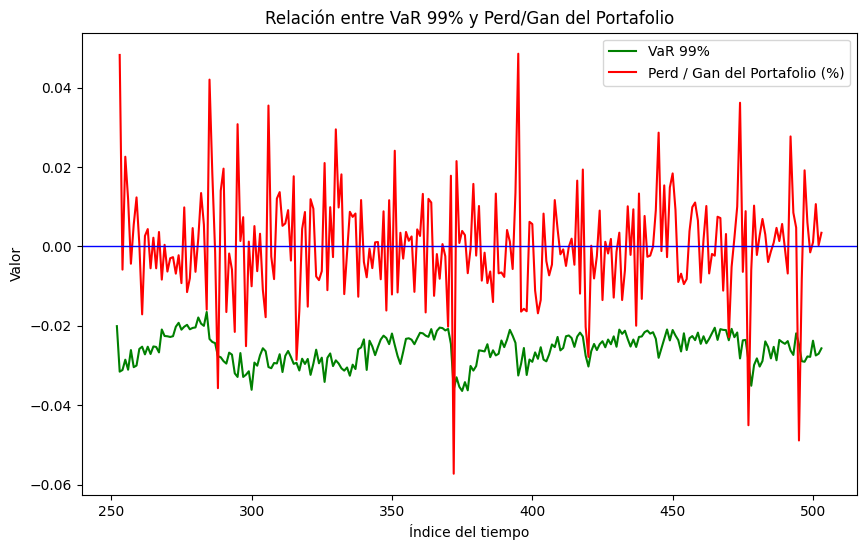

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df_final["VaR 99%"], color='green', label='VaR 99%')
plt.plot(df_final["Perd / Gan del Portafolio (%)"], color='red', label='Perd / Gan del Portafolio (%)')
plt.xlabel("Índice del tiempo")
plt.ylabel("Valor")
plt.title("Relación entre VaR 99% y Perd/Gan del Portafolio")
plt.axhline(0, color='blue', linestyle='-', linewidth=1)
plt.grid(False)
plt.legend()
plt.show()

# Creamos un excel con el ultimo dataframe

In [ ]:
df_final.to_excel("Rendmientos.xlsx")

# VaR Historico

In [47]:
df_final['VaR_H 99']=np.nan
#Recorremos desde el dia 252 en adelante    
for k in range(252, len(df_final)):
    port_sim=[] #Simulacion de perdidas/ganancias

    #hacemos solo 252 escenarios usando los rendimientos historicos(pasados)
    for j in range(252):
        simulacion_port=0 
        ganancia_perdida = df_final[f"Rendimiento {ticker}"] * df_final[f"Close_{ticker}"][k] * globals()["titulos_acciones"][ticker]
        simulacion_port += ganancia_perdida.sum()
        port_sim.append(simulacion_port)    
    #Calculamos el VaR usando percentiles
    VaR = np.percentile(port_sim, 1)
    df_final.loc[k, 'VaR_H 99'] = VaR

In [48]:
df_final["VaR_H 99%"] = df_final["VaR_H 99"] / df_final["Valuacion del Portafolio"]

In [49]:
df_final

,Date,Close_CEMEXCPO.MX,Close_CUERVO.MX,Close_LACOMERUBC.MX,Close_GRUMAB.MX,Close_VOLARA.MX,Close_BIMBOA.MX,Close_AGUA.MX,Close_TLEVISACPO.MX,Rendimiento CEMEXCPO.MX,...,Volatilidad BIMBOA.MX,Volatilidad AGUA.MX,Volatilidad TLEVISACPO.MX,Valuacion del Portafolio,Perd / Gan del Portafolio ($),Perd / Gan del Portafolio (%),VaR 99($),VaR 99%,VaR_H 99,VaR_H 99%
0,2023-04-17,10.86,43.410824,39.752998,247.746536,21.889999,90.484497,25.948826,18.331467,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-18,10.68,42.396278,39.141113,251.062698,21.420000,89.250885,25.407433,17.630056,-0.016575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-19,10.61,42.220680,39.377975,246.828064,21.400000,88.545959,24.828049,16.957081,-0.006554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-20,10.54,42.513344,39.210197,255.152359,21.299999,91.414604,24.847044,16.843340,-0.006598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-21,10.35,42.054848,38.894382,253.218719,21.160000,90.288681,25.511913,16.739075,-0.018027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2025-04-10,10.25,20.139999,36.119999,368.000000,9.700000,57.790001,11.200000,6.710000,-0.057904,...,0.381712,0.383790,0.460385,155972.999668,-237.003422,-0.001517,-4342.493732,-0.027841,-1462.140016,-0.009374
500,2025-04-11,10.50,20.910000,35.980000,367.470001,9.630000,58.290001,10.760000,6.890000,0.024390,...,0.373312,0.399219,0.458720,156129.000521,156.000853,0.001000,-3710.607213,-0.023766,-1501.362810,-0.009616
501,2025-04-14,10.75,20.750000,36.750000,371.380005,9.230000,59.330002,10.910000,6.870000,0.023810,...,0.369331,0.392245,0.447224,157791.001797,1662.001276,0.010645,-4336.795507,-0.027484,-1497.004722,-0.009487
502,2025-04-15,10.54,20.690001,36.970001,371.750000,9.160000,59.240002,10.790000,6.980000,-0.019535,...,0.360019,0.384301,0.439589,157836.000967,44.999170,0.000285,-4270.898371,-0.027059,-1520.974259,-0.009636


In [50]:
# Creamos una nueva columna para marcar las excepciones del VaR99
df_final['Excepciones_VaR_H 99'] = 0
# Recorremos nuestro dataframe desde la fila 252
for i in range(252, len(df_final)):
    # Si la pérdida o ganancia del portafolio es menor que el VaR99
    if df_final['Perd / Gan del Portafolio (%)'][i] < df_final['VaR_H 99%'][i]:
        df_final.loc[i, 'Excepciones_VaR_H 99'] = 1  # Marcamos como excepción
# Calculamos el total de excepciones 
total_excepciones = df_final['Excepciones_VaR_H 99'].sum()
print(f"Total de excepciones VaR99 Histórico: {total_excepciones}")

Total de excepciones VaR99 Histórico: 39


In [51]:
# calculamos la eficiencia del VaR99 histórico
eficiencia_var_hist = (252 - total_excepciones) / 252
print(f"Eficiencia VaR99 Histórico: {eficiencia_var_hist * 100:.2f}%")

Eficiencia VaR99 Histórico: 84.52%


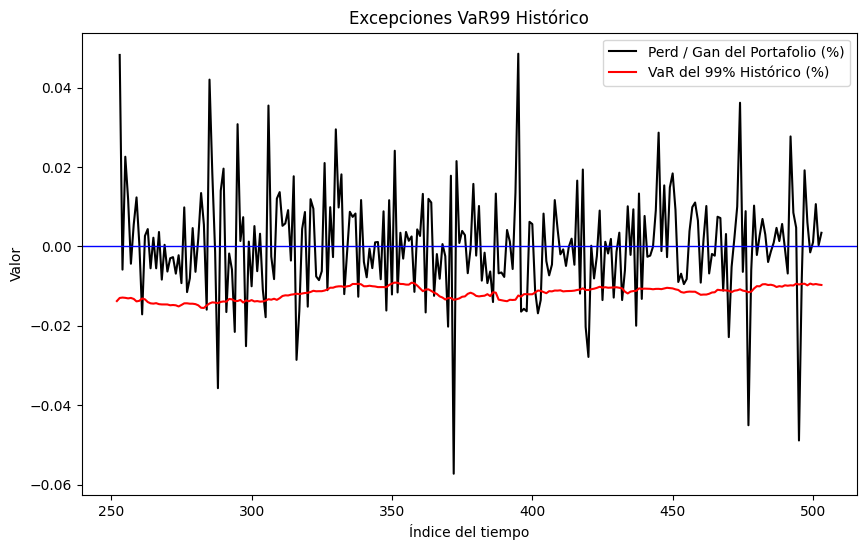

In [52]:
#creamos un gráfico para visualizar las excepciones
plt.figure(figsize=(10, 6))     
plt.plot(df_final['Perd / Gan del Portafolio (%)'], label='Perd / Gan del Portafolio (%)', color='black')
plt.plot(df_final['VaR_H 99%'], label='VaR del 99% Histórico (%)', color='red')
plt.axhline(0, color='blue', linestyle='-', linewidth=1)  # Línea horizontal en 0
plt.title('Excepciones VaR99 Histórico')
plt.xlabel('Índice del tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(False)
plt.show()

